# Table of Contents
1. Importing libraries
2. Importing data
3. Data cleaning
4. Explore data visually
5. Regression Analysis

## 1. Importing libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Importing data

In [2]:
df = df = pd.read_csv(r'/Users/alberttran/House Sales Analysis/02 Data/Prepared Data/house_data_cleaned.csv', index_col = 0)

In [3]:
# check df shape
df.shape

(21613, 20)

In [4]:
# display top 5 rows
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# display columns
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 3. Data cleaning

In [6]:
# check for missing values

df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# check for duplicate values

dups = df[df.duplicated()]

In [10]:
dups

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4352,2015-03,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
20524,2015-03,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,47.5818,-122.402,1510,1352


After reviewing the two records, it is determined that these are not actually duplicates. Therefore, no action will be made.

In [11]:
# check for mixed data-types
for col in df.columns.tolist():
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df[weird]) > 0:
        print (col)

No mixed data-types were found.

In [12]:
# Check the mean, median and max of the 'price' column
print('The mean of "price" is:' , df['price'].mean())
print('The median of "price" is:' , df['price'].median())
print('The max of "price" is:' , df['price'].max())

The mean of "price" is: 540088.1417665294
The median of "price" is: 450000.0
The max of "price" is: 7700000.0


In [13]:
# Check the mean, median and max of the 'sqft_living' column
print('The mean of "sqft_living" is:' , df['sqft_living'].mean())
print('The median of "sqft_living" is:' , df['sqft_living'].median())
print('The max of "sqft_living" is:' , df['sqft_living'].max())

The mean of "sqft_living" is: 2079.8997362698374
The median of "sqft_living" is: 1910.0
The max of "sqft_living" is: 13540


## 4. Exploring data visually

In [14]:
# Display the correlation between each feature and the 'price' variable
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

List above displays correlation coefficients between 'price' and other variables in order of strongest positive correlation to least.

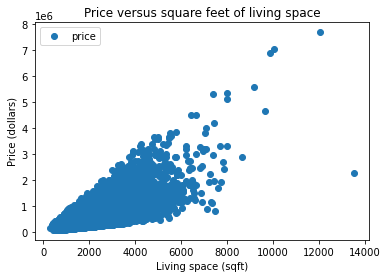

In [16]:
# Create a scatterplot for the 'price' and 'sqft_living' columns in seaborn
df.plot(x = 'sqft_living', y='price',style='o')
plt.title('Price versus square feet of living space')  
plt.xlabel('Living space (sqft)')  
plt.ylabel('Price (dollars)')  
plt.show()

**Hypothesis: The higher the square feet of living space, the greater in housing price.**

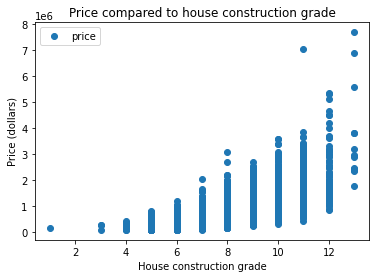

In [17]:
# Create a scatterplot for the 'grade' and 'sqft_living' columns in seaborn
df.plot(x = 'grade', y='price',style='o')
plt.title('Price compared to house construction grade')  
plt.xlabel('House construction grade')  
plt.ylabel('Price (dollars)')  
plt.show()

**Hypothesis: The higher the housing construction grade, the greater in housing price.**

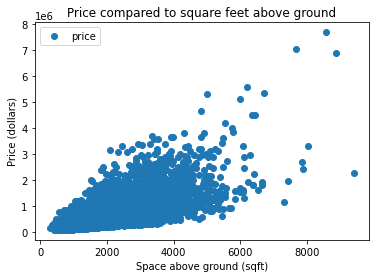

In [18]:
# Create a scatterplot for the 'sqft_above' and 'sqft_living' columns in seaborn
df.plot(x = 'sqft_above', y='price',style='o')
plt.title('Price compared to square feet above ground')  
plt.xlabel('Space above ground (sqft)')  
plt.ylabel('Price (dollars)')  
plt.show()

**Hypothesis: The higher the square feet above ground, the greater in housing price.**

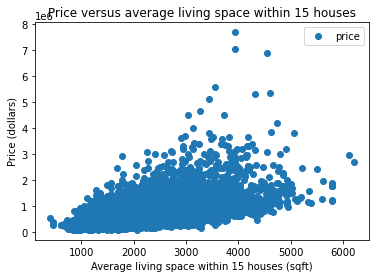

In [19]:
# Create a scatterplot for the 'sqft_living15' and 'sqft_living' columns in seaborn
df.plot(x = 'sqft_living15', y='price',style='o')
plt.title('Price versus average living space within 15 houses')  
plt.xlabel('Average living space within 15 houses (sqft)')  
plt.ylabel('Price (dollars)')  
plt.show()

**Hypothesis: The higher the average living spaces within 15 houses, the greater in housing price.**

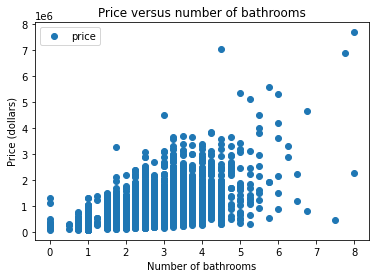

In [20]:
# Create a scatterplot for the 'bathrooms' and 'sqft_living' columns in seaborn
df.plot(x = 'bathrooms', y='price',style='o')
plt.title('Price versus number of bathrooms')  
plt.xlabel('Number of bathrooms')  
plt.ylabel('Price (dollars)')  
plt.show()

**Hypothesis: The higher the number of bathrooms, the greater in housing price.**

## 5. Regression analysis

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [22]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
# Create a regression object
regression = LinearRegression()

In [24]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

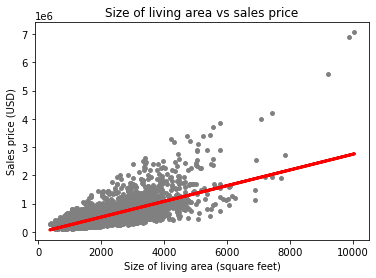

In [26]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Size of living area vs sales price')
plot_test.xlabel('Size of living area (square feet)')
plot_test.ylabel('Sales price (USD)')
plot_test.show()

The regression line appears to fit data points at low prices better than at high prices. In fact, it can be observed that more data points cluster around the regression line at lower prices, while there is a greater degree of variability at higher prices where the data points are scattered more widely.

In [27]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [28]:
# checking the accuracy of the model

print('Slope:',regression.coef_)
print('Mean asquared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean asquared error:  70170013932.11592
R2 score:  0.48889929019453016


The slope is positive meaning as the size of living area (sqft) increase, so does the price. This affirms my hypothesis previously states. The MSE is high, meaning that the regression is not an exact representation of the data. The R2 score of 0.488 means that this a poor fit. Meaning, **the size of the living area is not enough to predict sales price.**

In [29]:
# Create a dataframe comparing the real and the predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,297000.0,3.601163e+05
1,1578000.0,1.261901e+06
2,562100.0,3.628996e+05
3,631500.0,2.766177e+05
4,780000.0,8.471914e+05
5,485000.0,4.213486e+05
6,340000.0,4.408316e+05
7,335606.0,6.685044e+05
8,425000.0,6.467948e+05
9,490000.0,1.203452e+06


In [31]:
# predict

y_predicted_train = regression.predict(X_train)

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  67579354793.91105
R2 score:  0.49453356717789787


The values are almost identical to the model, meaning the model was not overdone. The conclusion is that the size of living space has a great effect on the housing price, and is enough to coorelate in this analysis.

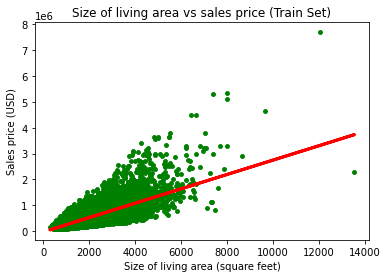

In [34]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Size of living area vs sales price (Train Set)')
plot_test.xlabel('Size of living area (square feet)')
plot_test.ylabel('Sales price (USD)')
plot_test.show()